### Fully Convolutional Network for Semantic Segmentation

Import Libs

In [1]:
from torchvision import models

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

Create Pre-trained FCN Model based resnet50

In [3]:
fcn = models.segmentation.fcn_resnet50(pretrained=True).eval()

Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to C:\Users\kivan/.cache\torch\hub\checkpoints\fcn_resnet50_coco-1167a1af.pth


  0%|          | 0.00/135M [00:00<?, ?B/s]

In [4]:
from PIL import Image 
import matplotlib.pyplot as plt 
import torch

Import Image

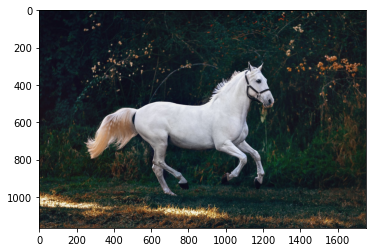

In [5]:
img = Image.open("../sample_data/horse-segmentation.jpeg") 
plt.imshow(img) 
plt.show()

Pre-process to Image

In [6]:
import torchvision.transforms as T

In [7]:
trf = T.Compose([T.Resize(256), T.CenterCrop(224), T.ToTensor(), T.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])]) 
inp = trf(img).unsqueeze(0)

In [8]:
out = fcn(inp)["out"]
print (out.shape)

torch.Size([1, 21, 224, 224])


In [9]:
import numpy as np

In [10]:
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy() 
print (om.shape)

(224, 224)


In [11]:
print (np.unique(om))

[ 0 13]


In [12]:
def decode_segmap(image, nc=21):
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
  rgb = np.stack([r, g, b], axis=2)
  return rgb

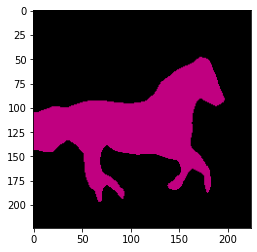

In [13]:
rgb = decode_segmap(om) 
plt.imshow(rgb) 
plt.show()